### Looping Graph

#### Objectives:
1. Implement looping logic to route the flow of the data back to the nodes
2. Create a single conditional edge to handle the decision making and control graph flow

***Main Goal:*** Cioding up looping logic

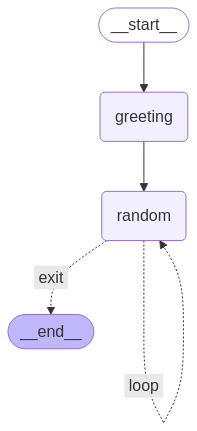

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [2]:
class AgentState(TypedDict):
    """Schema of the agent"""
    name : str
    number : List[int]
    counter : int

In [3]:
def greet(state: AgentState) -> AgentState:
    """Personalized greeting to the user."""

    state['name'] = f"Hi {state['name']}, How are you?"
    state['counter'] = 0
    return state

def generate_random(state: AgentState) -> AgentState:
    """ Generate random Number between 0 to 20"""
    state['number'].append(random.randint(0, 20))
    state['counter'] += 1
    return state

In [4]:
def should_continue(state: AgentState) -> str:
    """ Should we continue the loop or not """
    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("greet", greet)
graph.add_node("generate_random", generate_random)

graph.add_edge(START, "greet")
graph.add_edge("greet","generate_random")

graph.add_conditional_edges(
    "generate_random", 
    should_continue,
    {
        "loop" : "generate_random",
        "exit" : END
    }
)

app = graph.compile()

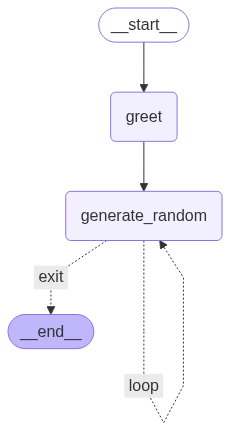

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

{'name': 'Hi Vaibhav, How are you?', 'number': [3, 7, 1, 17, 6], 'counter': 5}